**Grip-The SPARKS Foundation**

Task6-create a Decision Tree Classifier and visualize it graphically

Author - Vaishnavi Darade

Dataset link-https://bit.ly/3kXTdox



Importing libraries

In [15]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Importing dataset

In [16]:
df=pd.read_csv("../input/iris-2/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [17]:
df=df.drop(['Id'],axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Lable Encoding-convering the columns to numerical forms

In [19]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['Species'])
df['Species']= label_encoder.transform((df['Species']))
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Plotting the value of every x with respect to y

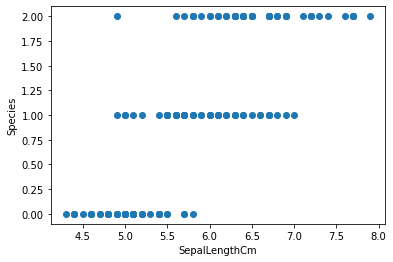

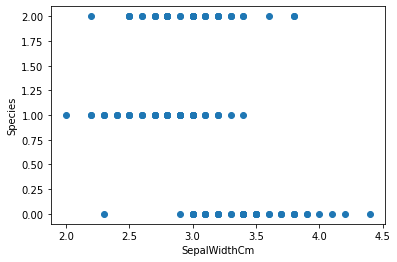

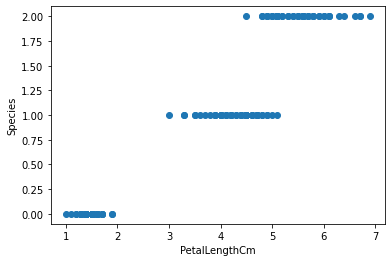

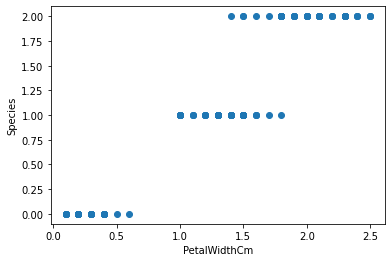

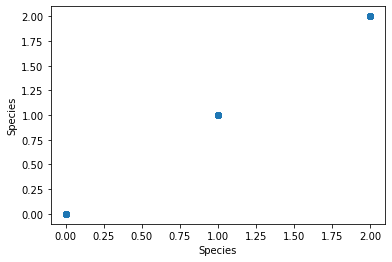

In [20]:
import matplotlib.pyplot as plt
for i in df:
    x = df[i]
    y = df['Species']
    plt.scatter(x,y)
    plt.xlabel(i)
    plt.ylabel('Species')
    plt.show()
    print("\n")

Heatmap

<AxesSubplot:>

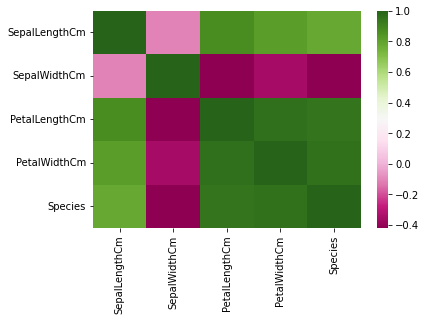

In [21]:
import seaborn as sns
sns.heatmap(df.corr(),cmap="PiYG")

Defining the value of x and y

In [22]:
x=df.drop(['Species'],axis=1)
y=df['Species']

counting value of y variable

<AxesSubplot:>

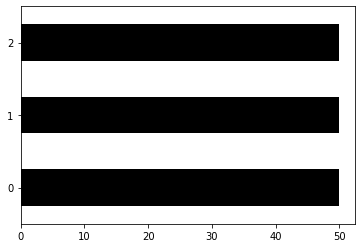

In [23]:
y.value_counts().plot(kind='barh',color='black')

Scaling the values

In [24]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
mmscaler.fit(x)
x = mmscaler.transform(x)

Standardization of values

In [25]:
from sklearn.preprocessing import StandardScaler
sscaler = StandardScaler()
sscaler.fit(x)
x = sscaler.transform(x)

Train-Test split

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 53)

Confusion matrix

In [27]:
from sklearn.metrics import confusion_matrix
#confusion_matrix(y_test,y_test_pred)
y_val=(y.unique()).astype(int)
y_val.sort()

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid = {  'criterion': ["gini", "entropy", "log_loss"], 'splitter': ["best", "random"]}
dt = DecisionTreeClassifier()
g_search = GridSearchCV(estimator = dt, param_grid = param_grid,cv = 5, n_jobs = 1, verbose = 0, return_train_score=True)
g_search.fit(X_train, y_train);
print(g_search.best_params_)

{'criterion': 'gini', 'splitter': 'best'}


In [29]:

model=DecisionTreeClassifier(criterion='gini',splitter='best')
model.fit(X_train,y_train)
y_test_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_test_pred)*100)

93.33333333333333


Confusion Matrix for Random forest Classifier

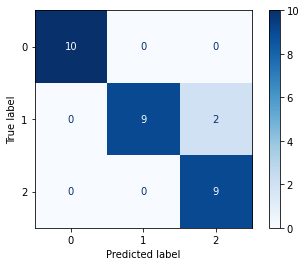

In [30]:
from sklearn.metrics import plot_confusion_matrix
cm=confusion_matrix(y_test,y_test_pred)
dict=plot_confusion_matrix(model,X_test,y_test,display_labels=y_val,cmap=plt.cm.Blues)
plt.show()

Defining classifier function

In [31]:
def classifier(I):
    print(I)
    I= mmscaler.transform(I)
    print(I)
    I= sscaler.transform(I)
    print(I)
    y_pred=model.predict(I)
    print(y_pred)
    y_pred=label_encoder.inverse_transform(y_pred)
    print(y_pred)

Predicting the new values

In [32]:
classifier([[5,3,1,0]])

[[5, 3, 1, 0]]
[[ 0.19444444  0.41666667  0.         -0.04166667]]
[[-1.02184904 -0.1249576  -1.56873522 -1.57592267]]
[0]
['Iris-setosa']
